In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('C:/USERS/YASHN/customer1.CSV')
df

1Gender of respondent  2 How old are you?   \
0                        0                    3   
1                        1                    2   
2                        1                    2   
3                        0                    2   
4                        1                    2   
..                     ...                  ...   
264                      1                    2   
265                      1                    3   
266                      1                    4   
267                      1                    1   
268                      1                    4   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

     5 Since How Long You are Shopping Online ?  \
0                                             5   
1                                             5   
2                                             4   
3                                             4   
4                                             3   
..                                          ...   
264                                           2   
265                                           2   
266                                           3   
267                                           3   
268                                           3   

     6 How many times you have made an online purchase in the past 1 year?  \
0                                                    4                       
1                                                    5                       
2                                                    5                       
3                                                    1                       
4                                                    2                       
..                                                 ...                       
264                                                  1                       
265                                                  4                       
266                                                  1                       
267                                                  1                       
268                                                  4                       

     7 How do you access the internet while shopping on-line?  \
0                                                    4          
1                                                    2          
2                                                    3          
3                                                    3          
4                                                    2          
..                                                 ...          
264                                                  3          
265                                 

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [4]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
# Checking the basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64 
 1   2 How old are you?                                                                                                                                                                    

In [6]:
Dict={'1Gender of respondent':'Gender', '2 How old are you? ':'Age',
       '3 Which city do you shop online from?':'City',
       '4 What is the Pin Code of where you shop online from?':'PinCode',
       '5 Since How Long You are Shopping Online ?': 'Years_of_shoping',
       '6 How many times you have made an online purchase in the past 1 year?':'No_Online_purchage_last_Year',
       '7 How do you access the internet while shopping on-line?':'Internet_Access',
       '8 Which device do you use to access the online shopping?':'Device_Used',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'Screen_size',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'Operating_system',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'Browser_Name',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'Channel_Used',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'Reach_after_first_visit',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'Decision_Time',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'Preferred_Payment_mode',
       '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'Abondon_shoping',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'Abondon_Reason',
       '18 The content on the website must be easy to read and understand':'Website_content_easeness',
       '19 Information on similar product to the one highlighted  is important for product comparison':'Information_for_Comparision',
       '20 Complete information on listed seller and product being offered is important for purchase decision.':'SellerProduct_info',
       '21 All relevant information on listed products must be stated clearly':'Clear_information',
       '22 Ease of navigation in website':'Ease_of_navigation', '23 Loading and processing speed':'Loading_processing_speed',
       '24 User friendly Interface of the website':'UserFriendly_Interface',
       '25 Convenient Payment methods':'Convenient_pay_mode',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust',
       '27 Empathy (readiness to assist with queries) towards the customers':'Empathy_to_customer',
       '28 Being able to guarantee the privacy of the customer':'Privacy_of_customers',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Comm_channels_Responsiveness',
       '30 Online shopping gives monetary benefit and discounts':'Monetry_benefits_and_discounts',
       '31 Enjoyment is derived from shopping online':'Enjoyement',
       '32 Shopping online is convenient and flexible':'Convenient_and_Flexible',
       '33 Return and replacement policy of the e-tailer is important for purchase decision':'Retirn_policy',
       '34 Gaining access to loyalty programs is a benefit of shopping online':'Loyality_program',
       '35 Displaying quality Information on the website improves satisfaction of customers':'Quality_info_on_web',
       '36 User derive satisfaction while shopping on a good quality website or application':'Satisfaction_due_to_good_quality_website',
       '37 Net Benefit derived from shopping online can lead to users satisfaction':'Net_benefits',
       '38 User satisfaction cannot exist without trust':'Satisfaction_Trust',
       '39 Offering a wide variety of listed product in several category':'Wide_variety',
       '40 Provision of complete and relevant product information':'Complete_Relevent_info',
       '41 Monetary savings':'Monetary_savings',
       '42 The Convenience of patronizing the online retailer':'Convenience_of_patronizing',
       '43 Shopping on the website gives you the sense of adventure':'Sense_of_advanture',
       '44 Shopping on your preferred e-tailer enhances your social status':'Social_status',
       '45 You feel gratification shopping on your favorite e-tailer':'gratification',
       '46 Shopping on the website helps you fulfill certain roles':'Help_fullfill_roles',
       '47 Getting value for money spent':'Value_of_money',
       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':'Online_retailer',
       'Easy to use website or application':'Easy_use_webapp',
       'Visual appealing web-page layout':'Visual_appealing', 'Wild variety of product on offer':'Wild_variety',
       'Complete, relevant description information of products':'Informtion_of_product',
       'Fast loading website speed of website and application':'Fast_loading_webApp',
       'Reliability of the website or application':'Reliability',
       'Quickness to complete purchase':'Quickness_purpchase',
       'Availability of several payment options':'Payment_option', 'Speedy order delivery ':'Speedy_delivery',
       'Privacy of customers’ information':'Info_Privacy',
       'Security of customer financial information':'Fincial_info_security',
       'Perceived Trustworthiness':'Perceived_Trustworthiness',
       'Presence of online assistance through multi-channel':'Online_assistance',
       'Longer time to get logged in (promotion, sales period)':'Longer_logged_in',
       'Longer time in displaying graphics and photos (promotion, sales period)':'Longer_display_time',
       'Late declaration of price (promotion, sales period)':'Late_price_declaration',
       'Longer page loading time (promotion, sales period)':'Longer_page_loading',
       'Limited mode of payment on most products (promotion, sales period)':'Limited_payment_mode',
       'Longer delivery period':'Long_delivary_period', 'Change in website/Application design':'Change_in_website',
       'Frequent disruption when moving from one page to another':'Frequent_disruption',
       'Website is as efficient as before':'Efficient_website',
       'Which of the Indian online retailer would you recommend to a friend?':'Recommended_retailers'}

In [7]:
df.rename(columns=Dict, inplace=True)

In [8]:
df.head()

Gender  Age           City  PinCode  Years_of_shoping  \
0       0    3          Delhi   110009                 5   
1       1    2          Delhi   110030                 5   
2       1    2  Greater Noida   201308                 4   
3       0    2        Karnal    132001                 4   
4       1    2     Bangalore    530068                 3   

   No_Online_purchage_last_Year  Internet_Access  Device_Used  Screen_size  \
0                             4                4            3            5   
1                             5                2            1            2   
2                             5                3            1            4   
3                             1                3            1            4   
4                             2                2            1            2   

   Operating_system  Browser_Name  Channel_Used  Reach_after_first_visit  \
0                 1             1             1                        1   
1                 3             1             1                        4   
2                 2             1             1                        4   
3                 3             2             1                        1   
4                 3             2             3                        4   

   Decision_Time  Preferred_Payment_mode  Abondon_shoping  \
0              3                       4                3   
1              5                       1                5   
2              4                       4                3   
3              3                       1                1   
4              5                       1                4   

   17 Why did you abandon the �Bag�, �Shopping Cart�?\t\t\t\t\t                                                                                                                                                         \
0                                                  3                                                                                                                                                                     
1                                                  5                                                                                                                                                                     
2                                                  5                                                                                                                                                                     
3                                                  2                                                                                                                                                                     
4                                                  2                                                                                                                                                                     

   Website_content_easeness  Information_for_Comparision  SellerProduct_info  \
0                         4                            3                   3   
1                         5                            5                   5   
2                         5                            4                   4   
3                         4                            4                   3   
4                         5                            3                   3   

   Clear_information  Ease_of_navigation  Loading_processing_speed  \
0                  4                   4                         1   
1                  5                   5                         5   
2                  4                   4                         4   
3                  4                   5                         4   
4                  4                   4                         5   

   UserFriendly_Interface  Convenient_pay_mode  Trust  Empathy_to_customer  \
0                       2                    2      2       

In [9]:
# Checking the null values
df.isnull().sum()

Gender                                                                                                                                                                                                                 0
Age                                                                                                                                                                                                                    0
City                                                                                                                                                                                                                   0
PinCode                                                                                                                                                                                                                0
Years_of_shoping                                                                                                                    

<AxesSubplot:>

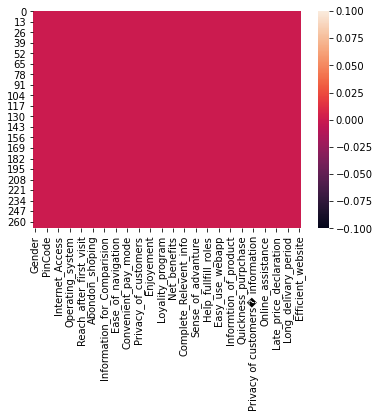

In [64]:
sns.heatmap(df.isnull())

There are no null values in our dataset.

In [10]:
# Statistical Summary
df.describe()

Gender         Age        PinCode  Years_of_shoping  \
count  269.000000  269.000000     269.000000        269.000000   
mean     0.669145    2.959108  220465.747212          3.524164   
std      0.471398    1.066012  140524.341051          1.436586   
min      0.000000    1.000000  110008.000000          1.000000   
25%      0.000000    2.000000  122018.000000          3.000000   
50%      1.000000    3.000000  201303.000000          4.000000   
75%      1.000000    4.000000  201310.000000          5.000000   
max      1.000000    5.000000  560037.000000          5.000000   

       No_Online_purchage_last_Year  Internet_Access  Device_Used  \
count                    269.000000       269.000000   269.000000   
mean                       2.672862         3.260223     1.676580   
std                        1.651788         1.135887     0.843904   
min                        1.000000         2.000000     1.000000   
25%                        1.000000         2.000000     1.000000   
50%                        2.000000         3.000000     1.000000   
75%                        4.000000         5.000000     2.000000   
max                        5.000000         5.000000     4.000000   

       Screen_size  Operating_system  Browser_Name  Channel_Used  \
count   269.000000        269.000000    269.000000    269.000000   
mean      4.282528          1.776952      1.275093      1.360595   
std       0.923426          0.797892      0.645429      0.897805   
min       2.000000          1.000000      1.000000      1.000000   
25%       4.000000          1.000000      1.000000      1.000000   
50%       4.000000          2.000000      1.000000      1.000000   
75%       5.000000          2.000000      1.000000      1.000000   
max       5.000000          3.000000      4.000000      4.000000   

       Reach_after_first_visit  Decision_Time  Preferred_Payment_mode  \
count               269.000000     269.000000              269.000000   
mean                  2.546468       3.921933                1.784387   
std                   1.264718       1.196014                1.084997   
min                   1.000000       1.000000                1.000000   
25%                   1.000000       3.000000                1.000000   
50%                   3.000000       4.000000                1.000000   
75%                   4.000000       5.000000                2.000000   
max                   4.000000       5.000000                4.000000   

       Abondon_shoping  \
count       269.000000   
mean          2.884758   
std           1.028380   
min           1.000000   
25%           3.000000   
50%           3.000000   
75%           3.000000   
max           5.000000   

       17 Why did you abandon the �Bag�, �Shopping Cart�?\t\t\t\t\t                                                                                                                                                         \
count                                         269.000000                                                                                                                                                                     
mean                                            2.684015                                                                                                                                                                     
std                                             1.344060                                                                                                                                                                     
min                                             1.000000                                                                                                                                                                     
25%                                             2.000000                                                                                                                          

In [11]:
# Checking Correlation
df.corr()

Gender       Age  \
Gender                                              1.000000 -0.034449   
Age                                                -0.034449  1.000000   
PinCode                                             0.260696 -0.057393   
Years_of_shoping                                   -0.046005  0.014049   
No_Online_purchage_last_Year                        0.076121  0.005089   
Internet_Access                                    -0.200974  0.024228   
Device_Used                                        -0.241847  0.292176   
Screen_size                                        -0.058760  0.227841   
Operating_system                                   -0.038207 -0.133597   
Browser_Name                                       -0.116712 -0.151708   
Channel_Used                                       -0.166694 -0.046915   
Reach_after_first_visit                             0.104118 -0.130048   
Decision_Time                                       0.139327  0.135038   
Preferred_Payment_mode                              0.049685 -0.030234   
Abondon_shoping                                     0.090390  0.101200   
17 Why did you abandon the �Bag�, �Shopping Car... -0.024279 -0.094993   
Website_content_easeness                            0.166977 -0.129724   
Information_for_Comparision                         0.260724 -0.043793   
SellerProduct_info                                  0.079679 -0.037330   
Clear_information                                   0.143320 -0.005868   
Ease_of_navigation                                  0.167883 -0.118419   
Loading_processing_speed                            0.225080 -0.094518   
UserFriendly_Interface                              0.231970 -0.200714   
Convenient_pay_mode                                 0.230923 -0.158029   
Trust                                               0.177032 -0.212230   
Empathy_to_customer                                 0.105170 -0.216675   
Privacy_of_customers                                0.055174 -0.235714   
Comm_channels_Responsiveness                        0.029508 -0.110268   
Monetry_benefits_and_discounts                      0.164411 -0.244417   
Enjoyement                                          0.189852 -0.200653   
Convenient_and_Flexible                             0.234597 -0.062623   
Retirn_policy                                       0.183537  0.014573   
Loyality_program                                    0.113073  0.095167   
Quality_info_on_web                                 0.285572  0.031702   
Satisfaction_due_to_good_quality_website            0.178033 -0.029635   
Net_benefits                                        0.347038 -0.141905   
Satisfaction_Trust                                  0.097540 -0.094664   
Wide_variety                                        0.152595  0.035895   
Complete_Relevent_info                              0.357061  0.082622   
Monetary_savings                                    0.201673 -0.056316   
Convenience_of_patronizing                          0.198382  0.035612   
Sense_of_advanture                                 -0.005218 -0.002979   
Social_status                                      -0.046397 -0.176643   
gratification                                       0.018482 -0.203841   
Help_fullfill_roles                                -0.113160 -0.121404   
Value_of_money                                      0.202014  0.052869   

                                                     PinCode  \
Gender                                              0.260696   
Age                                                -0.057393   
PinCode                                             1.000000   
Years_of_shoping                                    0.092980   
No_Online_purchage_last_Year                       -0.021229   
Internet_Access                                     0.134879   
Device_Used                                        -0.103424   
Screen_size                                        -0.189814   

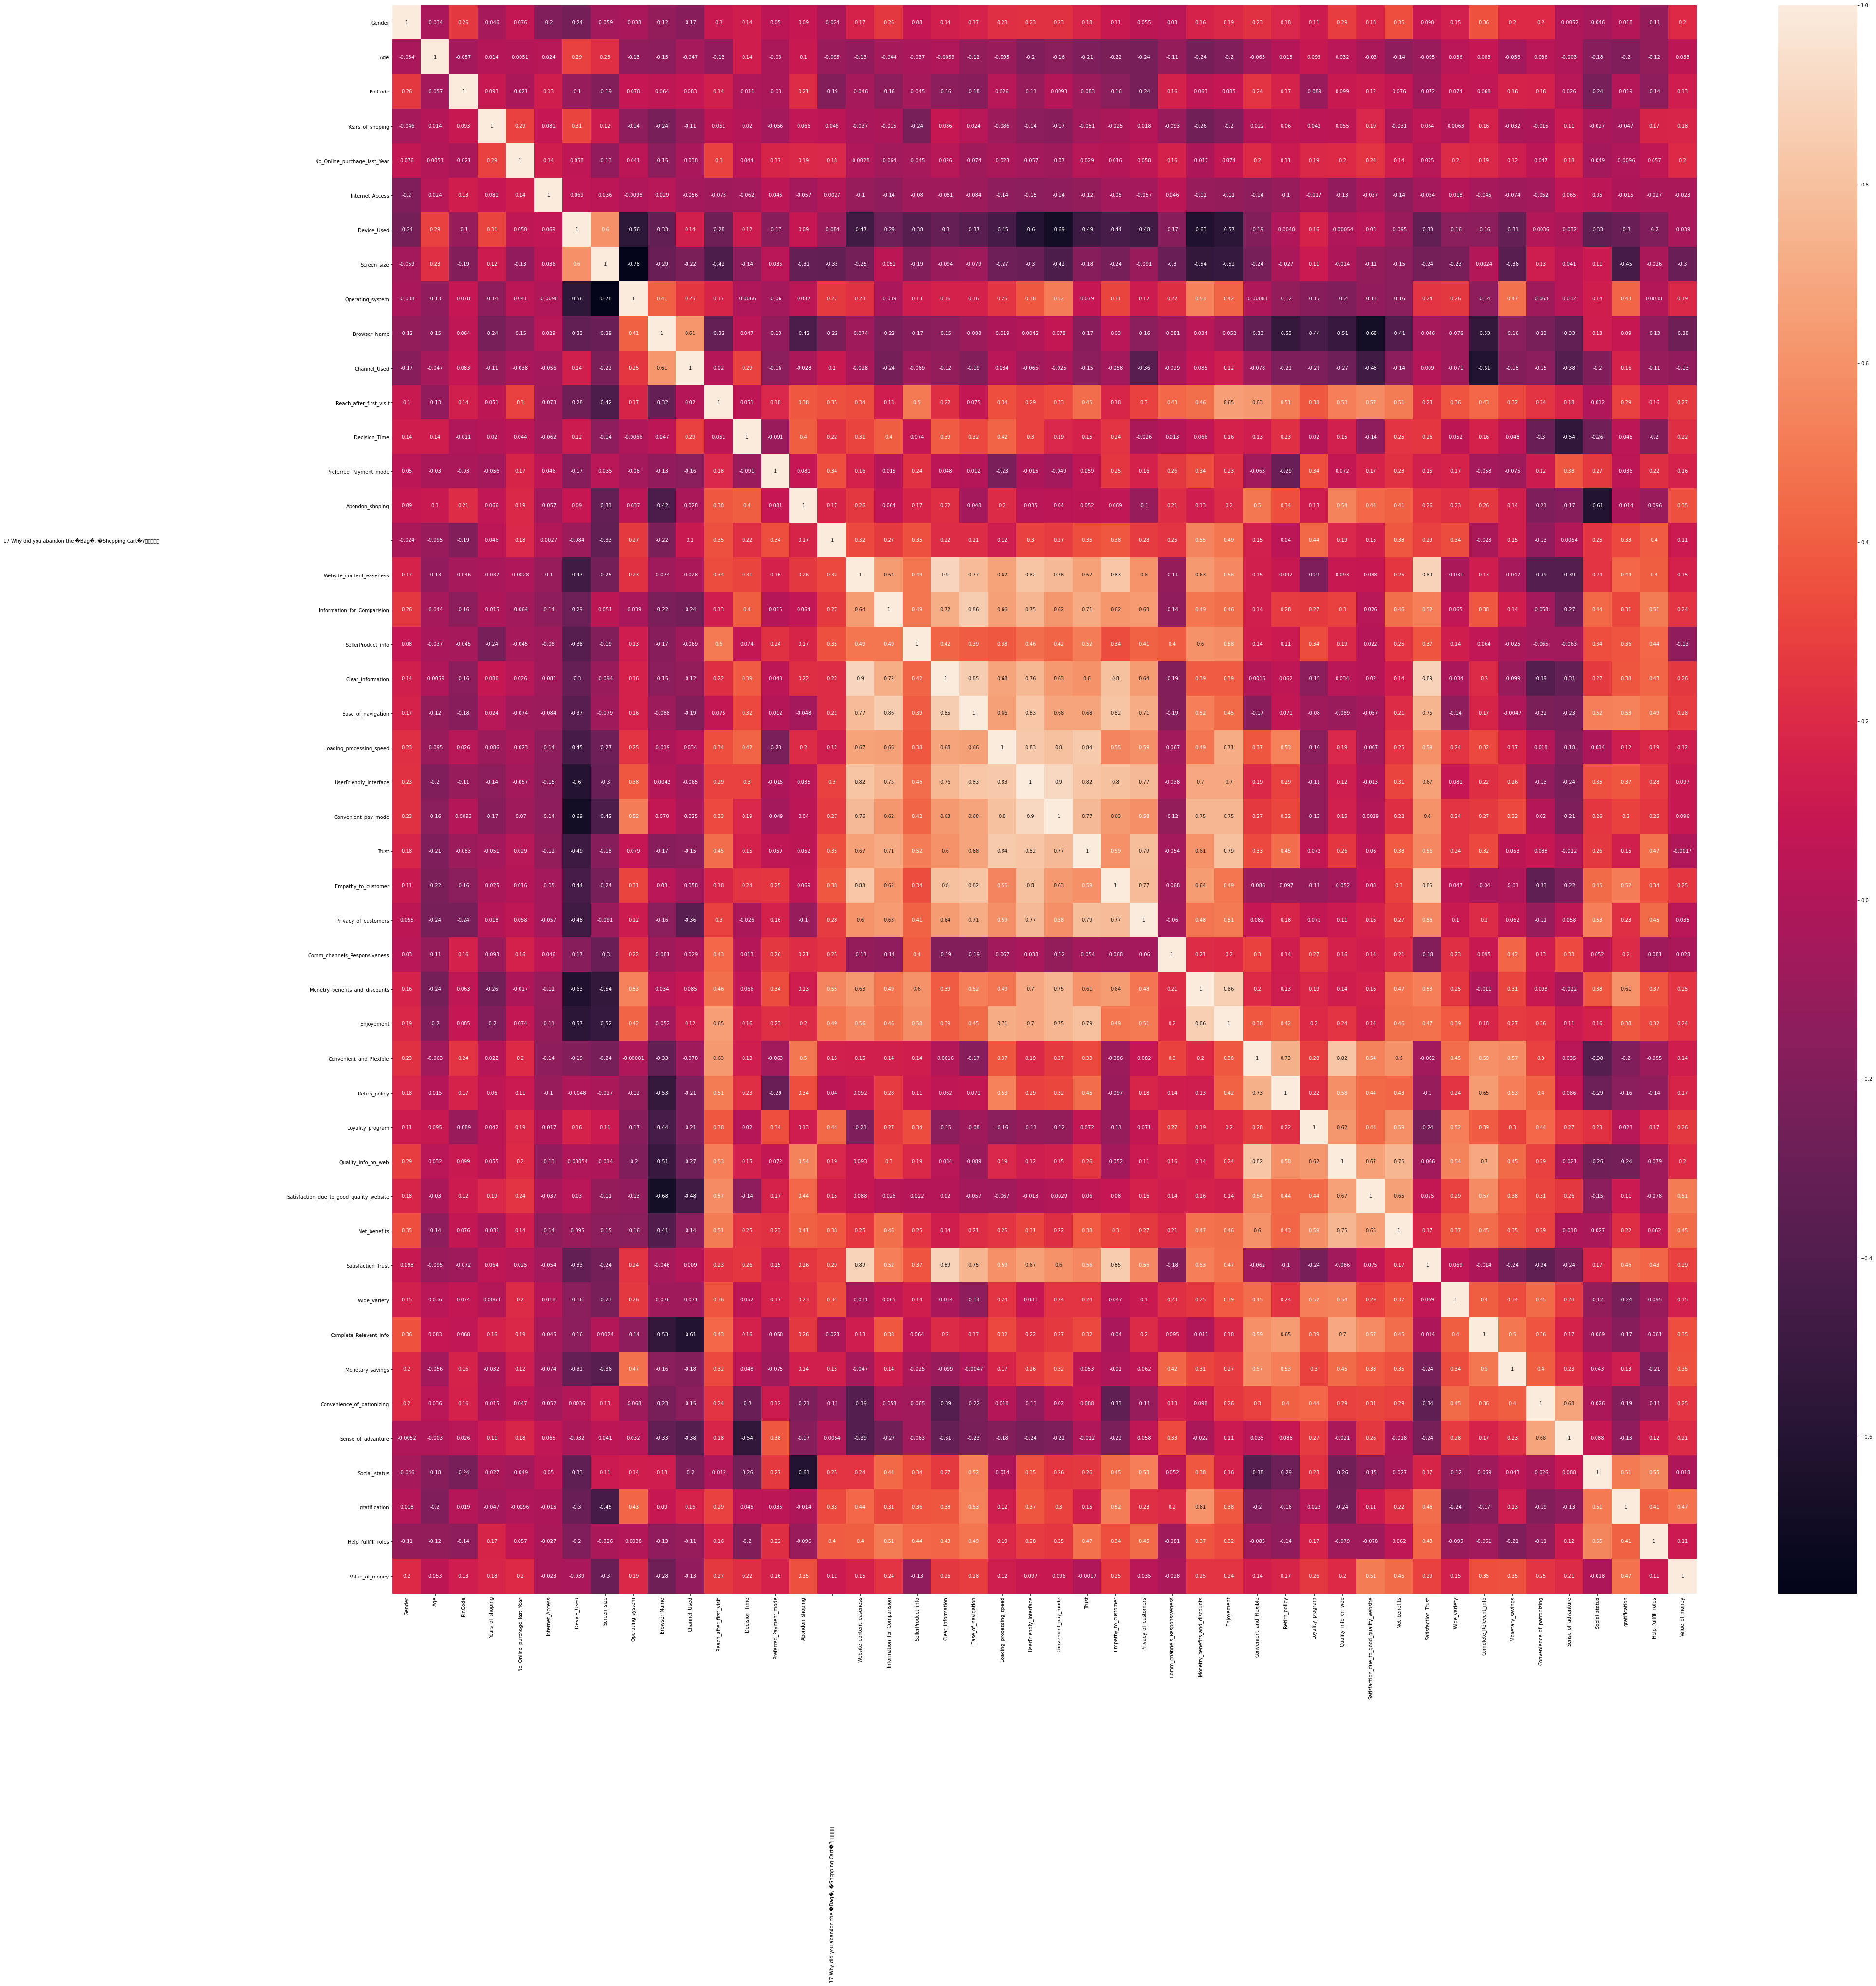

In [12]:
corr_hmap=df.corr()
plt.figure(figsize=(60,60))
sns.heatmap(corr_hmap,annot=True)
plt.show()

1    180
0     89
Name: Gender, dtype: int64

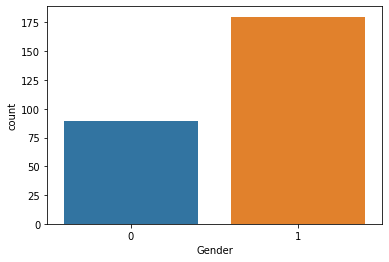

In [13]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()

Here we can see there are more no of female shoppers than male.

3    81
2    79
4    70
1    20
5    19
Name: Age, dtype: int64

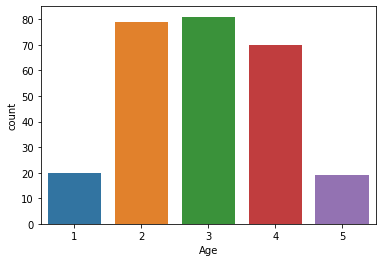

In [14]:
sns.countplot(df['Age'])
df['Age'].value_counts()

Maximum online shoppers are from the age group 31-40 Years.
More than 75 percent of online shoppers  lies between 21-50 years old.
Numbers for less than 20 years and above 51 are less, which indicates these age group rarely use online shoping.

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64

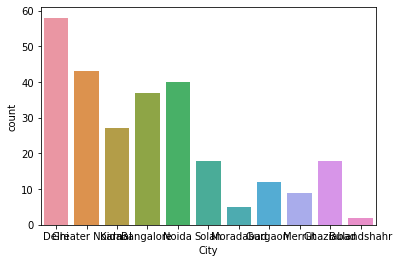

In [15]:
sns.countplot(df['City'])
df['City'].value_counts()

Delhi has highest number of customers who shop online.
Graph also shows that most of the customers are from Delhi, Greater Noida, Noida, Banglore and Karnal.

<AxesSubplot:xlabel='Years_of_shoping', ylabel='count'>

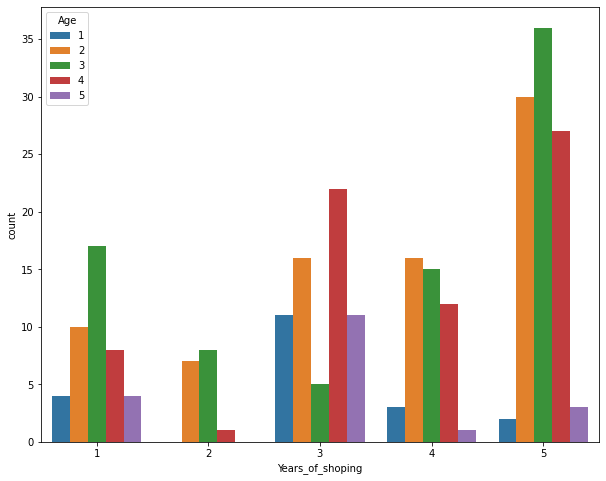

In [16]:
# About online retailing 
plt.figure(figsize=(10,8))
sns.countplot(df['Years_of_shoping'],hue=df['Age'])

Maximum no of people are shopping online for more than 4 yrs just excluding the age grp of less than 20 yrs and above 50yrs. People from 1-2 years doesnt contain teenager or senior citizen.

<AxesSubplot:xlabel='Years_of_shoping', ylabel='count'>

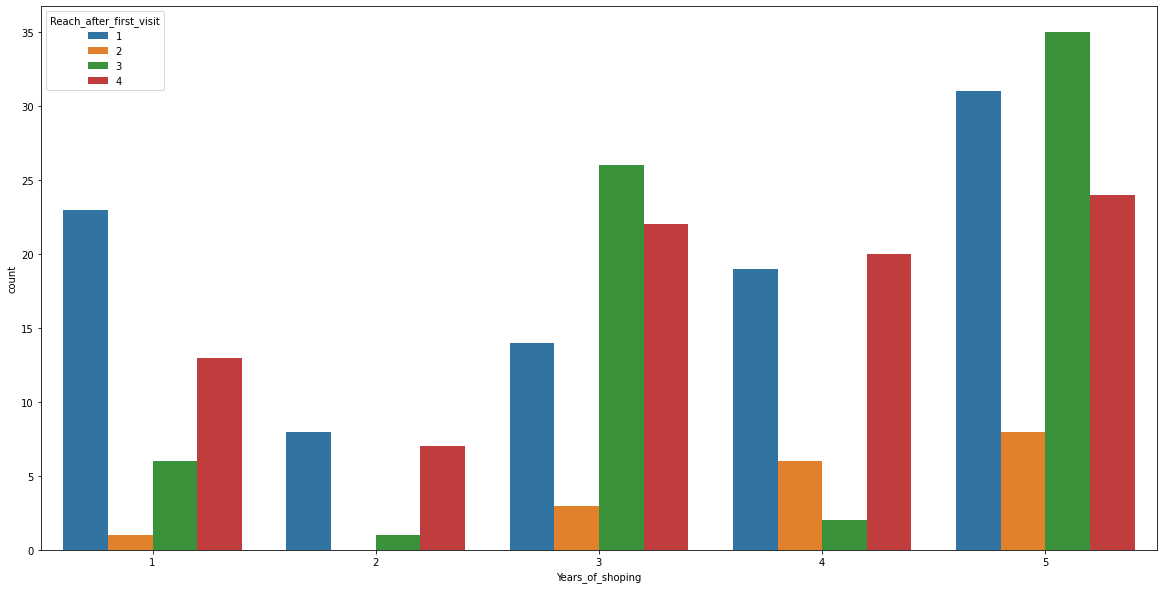

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(df['Years_of_shoping'],
              hue=df['Reach_after_first_visit'])

Here we can observe  that people shopping more than 3 yrs use link,url but not the app for shopping. This shows that online brands should update their platforms.

3    118
2     76
5     71
4      4
Name: Internet_Access, dtype: int64

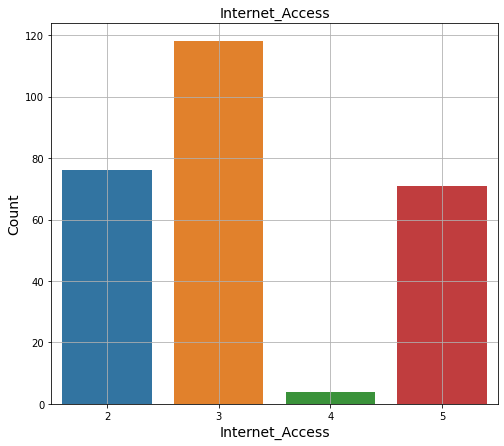

In [18]:
plt.figure(figsize=(8,7))
sns.countplot(df['Internet_Access'])
plt.xlabel('Internet_Access', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Internet_Access', fontsize=14)
plt.grid()

df['Internet_Access'].value_counts()

Majority of the shoppers are using Mobile internet for shopping online.

4    101
5     87
3     52
2     18
1     11
Name: SellerProduct_info, dtype: int64

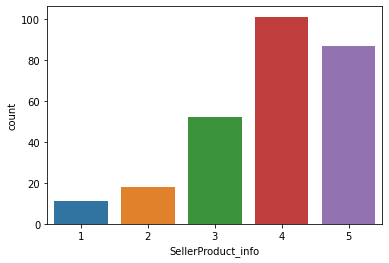

In [19]:
sns.countplot(df['SellerProduct_info'])
df['SellerProduct_info'].value_counts()

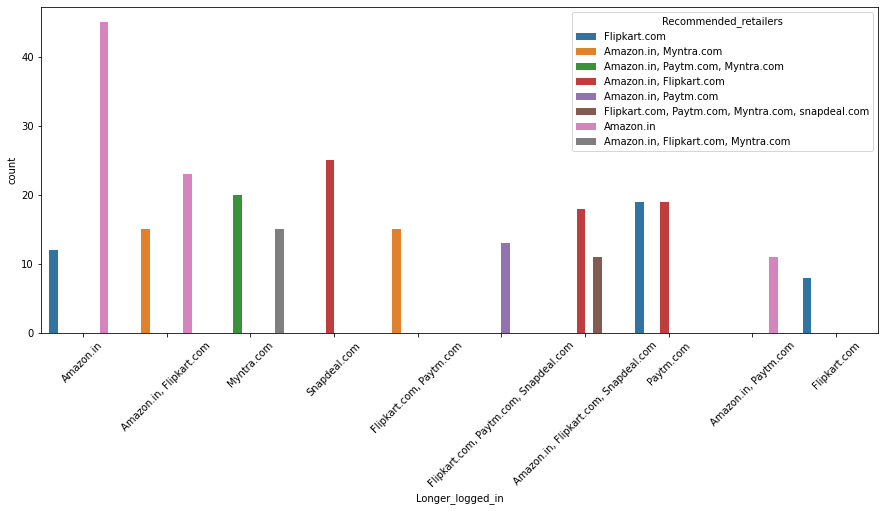

<Figure size 432x288 with 0 Axes>

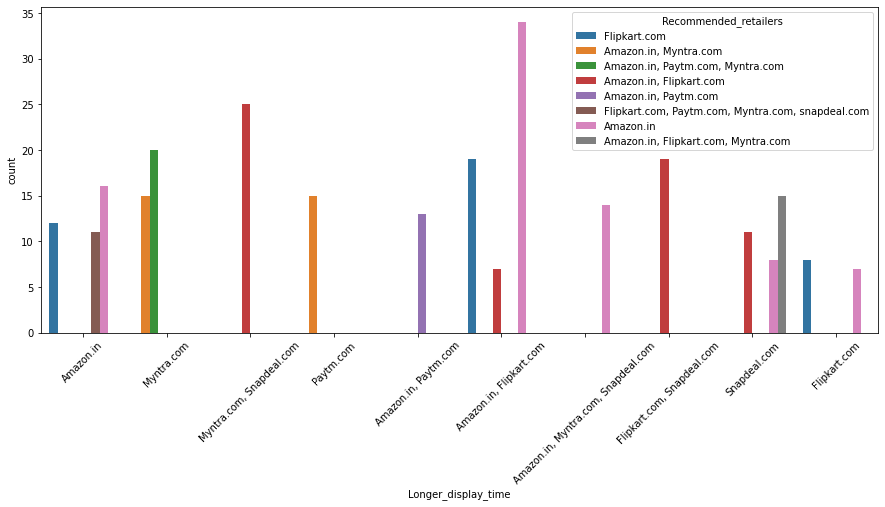

<Figure size 432x288 with 0 Axes>

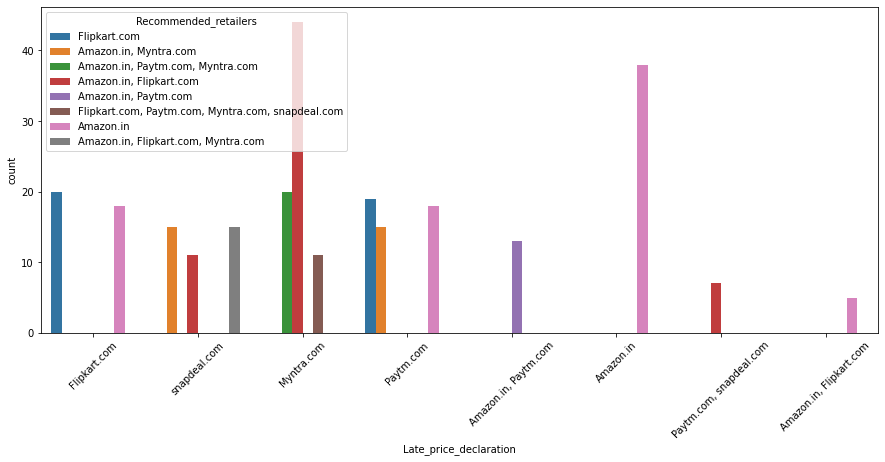

<Figure size 432x288 with 0 Axes>

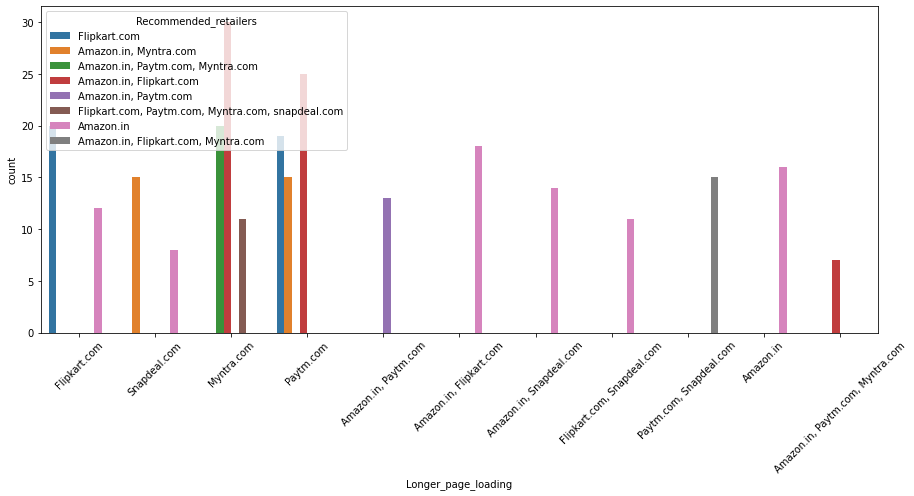

<Figure size 432x288 with 0 Axes>

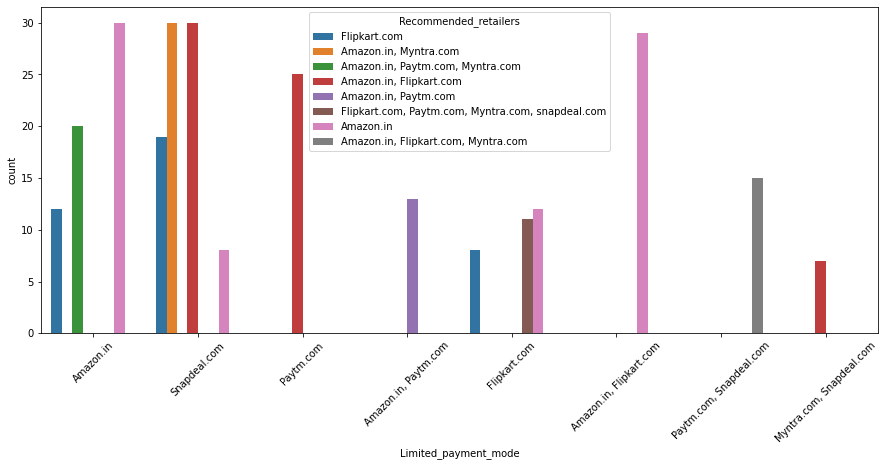

<Figure size 432x288 with 0 Axes>

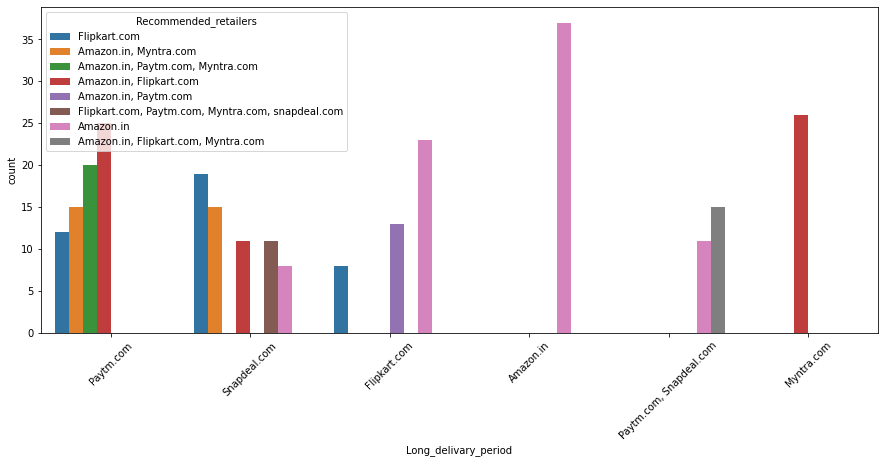

<Figure size 432x288 with 0 Axes>

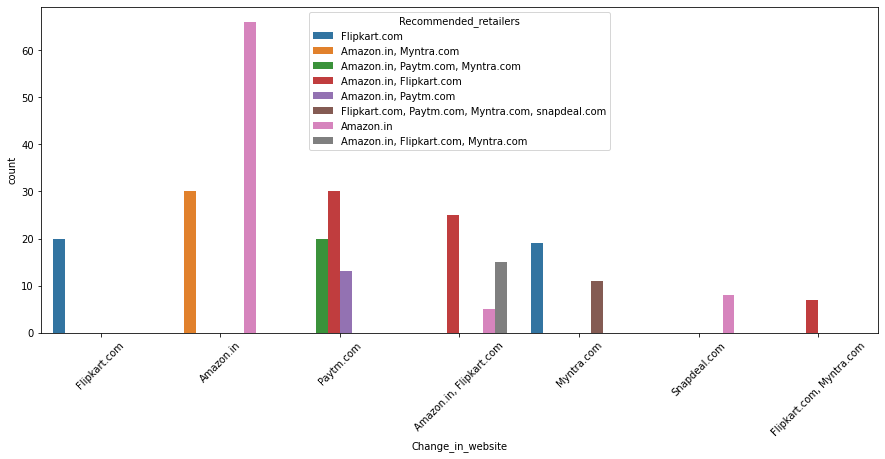

<Figure size 432x288 with 0 Axes>

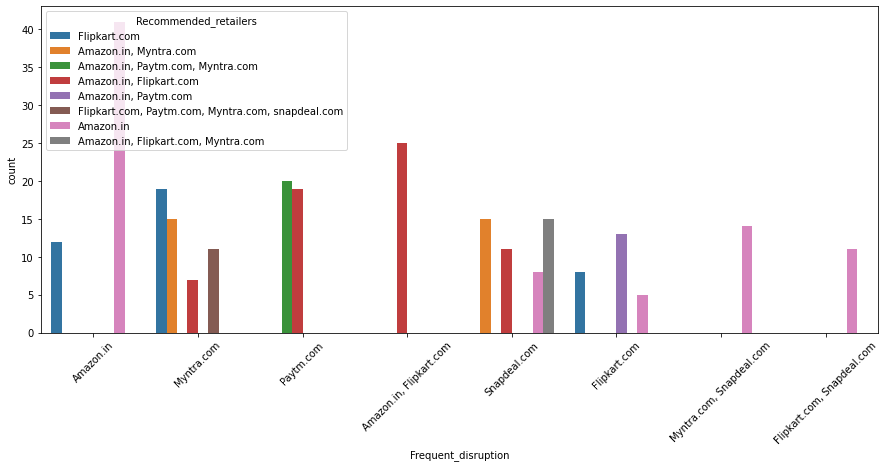

<Figure size 432x288 with 0 Axes>

In [20]:
#Collecting all the negative remarks about a brand
neg=['Longer_logged_in',
       'Longer_display_time',
       'Late_price_declaration',
       'Longer_page_loading',
       'Limited_payment_mode',
       'Long_delivary_period', 'Change_in_website',
       'Frequent_disruption']
for i in neg:
        plt.figure(figsize=(15,6))
        sns.countplot(df[i],hue=df['Recommended_retailers'])
        plt.xticks(rotation=45)
        plt.figure()

We observe that customers are more loyal towards Amazon ,Flipkart and Paytm.

In [25]:
# Checking the skewness
df.skew()


Gender                                                                                                                                                                                                                -0.723007
Age                                                                                                                                                                                                                    0.063243
PinCode                                                                                                                                                                                                                1.748322
Years_of_shoping                                                                                                                                                                                                      -0.554705
No_Online_purchage_last_Year                                                                            

In [29]:
from sklearn.preprocessing import LabelEncoder

df = df.copy()
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df.head() 

Gender  Age  City  PinCode  Years_of_shoping  No_Online_purchage_last_Year  \
0       0    2     2        1                 4                             3   
1       1    1     2        5                 4                             4   
2       1    1     4       23                 3                             4   
3       0    1     6       11                 3                             0   
4       1    1     0       31                 2                             1   

   Internet_Access  Device_Used  Screen_size  Operating_system  Browser_Name  \
0                2            2            2                 0             0   
1                0            0            0                 2             0   
2                1            0            1                 1             0   
3                1            0            1                 2             1   
4                0            0            0                 2             1   

   Channel_Used  Reach_after_first_visit  Decision_Time  \
0             0                        0              2   
1             0                        3              4   
2             0                        3              3   
3             0                        0              2   
4             1                        3              4   

   Preferred_Payment_mode  Abondon_shoping  \
0                       2                1   
1                       0                3   
2                       2                1   
3                       0                0   
4                       0                2   

   17 Why did you abandon the �Bag�, �Shopping Cart�?\t\t\t\t\t                                                                                                                                                         \
0                                                  2                                                                                                                                                                     
1                                                  4                                                                                                                                                                     
2                                                  4                                                                                                                                                                     
3                                                  1                                                                                                                                                                     
4                                                  1                                                                                                                                                                     

   Website_content_easeness  Information_for_Comparision  SellerProduct_info  \
0                         2                            1                   2   
1                         3                            3                   4   
2                         3                            2                   3   
3                         2                            2                   2   
4                         3                            1                   2   

   Clear_information  Ease_of_navigation  Loading_processing_speed  \
0                  2                   2                         0   
1                  3                   3                         4   
2                  2                   2                         3   
3                  2                   3                         3   
4                  2                   2                         4   

   UserFriendly_Interface  Convenient_pay_mode  Trust  Empathy_to_customer  \
0                       1                    0      0                    3   
1                       4           

In [30]:
# Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.42213639, 0.03843148, 0.78397694, ..., 0.08825722, 1.40519246,
        0.98469733],
       [0.70316744, 0.9013929 , 0.78397694, ..., 1.0192844 , 0.16163354,
        0.52322768],
       [0.70316744, 0.9013929 , 0.15539334, ..., 1.30828355, 0.94504654,
        0.98469733],
       ...,
       [0.70316744, 0.97825586, 1.41256055, ..., 1.77379714, 1.33675303,
        0.98469733],
       [0.70316744, 1.84121727, 1.73035746, ..., 1.0192844 , 0.55334004,
        1.32265095],
       [0.70316744, 0.97825586, 0.46968514, ..., 1.0192844 , 1.40519246,
        0.98469733]])

In [31]:
threshold=3
print(np.where(z>3))

(array([  6,  13,  18,  27,  37,  51,  74,  82,  82,  88,  89, 101, 103,
       103, 109, 112, 122, 124, 124, 130, 133, 140, 147, 151, 153, 182,
       182, 191, 196, 198, 198, 203, 203, 206, 206, 207, 229, 245, 247,
       253, 259, 264, 264], dtype=int64), array([11, 28, 11, 28, 11, 11, 28, 10, 11, 39, 11, 28, 10, 11, 11, 39, 28,
       10, 11, 11, 39, 11, 28, 28, 28, 10, 11, 11, 39, 10, 11, 10, 11, 10,
       11, 39, 11, 28, 28, 11, 28, 10, 11], dtype=int64))


In [32]:
z[6][8]

0.9052349798009189

In [33]:
df_new=df[(z<3).all(axis=1)]
df_new

Gender  Age  City  PinCode  Years_of_shoping  \
0         0    2     2        1                 4   
1         1    1     2        5                 4   
2         1    1     4       23                 3   
3         0    1     6       11                 3   
4         1    1     0       31                 2   
5         1    2     9       23                 4   
7         0    3     2        4                 3   
8         1    0    10       14                 2   
9         1    2     2        6                 0   
10        0    2     8       29                 4   
11        1    3     9       23                 4   
12        1    4     5       10                 2   
14        1    1     6       11                 0   
15        1    1     0       38                 2   
16        0    2     9       23                 1   
17        0    3     2        2                 0   
19        1    1    10       14                 1   
20        1    1     9       23                 1   
21        0    2     5       10                 3   
22        0    3     4       24                 4   
23        1    3     4       28                 4   
24        1    1     7       30                 3   
25        1    1     0       31                 2   
26        0    1     3       16                 0   
28        1    3     4       22                 4   
29        1    3     6       11                 2   
30        1    0     0       35                 4   
31        0    2     9       21                 2   
32        0    2     2        7                 4   
33        1    3     4       23                 4   
34        1    4     6       12                 3   
35        1    1     0       37                 2   
36        0    2     9       21                 0   
38        1    3     4       23                 4   
39        1    1     6       12                 2   
40        1    1     0       33                 4   
41        0    2     9       19                 3   
42        0    1     2        8                 2   
43        1    1     4       25                 0   
44        1    2     7       30                 4   
45        1    3     0       38                 4   
46        0    3     9       23                 4   
47        0    0     2        2                 4   
48        1    2     4       27                 2   
49        1    2     6       11                 4   
50        1    3     0       32                 3   
52        0    3     2        8                 0   
53        1    3     4       25                 4   
54        1    1     7       30                 4   
55        1    1     0       34                 3   
56        0    1     9       24                 2   
57        0    1     2        8                 0   
58        1    2     4       22                 4   
59        1    3     6       11                 4   
60        1    3     0       35                 3   
61        0    0     9       23                 2   
62        0    2     2        3                 0   
63        1    2     4       24                 4   
64        1    3     7       30                 2   
65        1    4     0       38                 4   
66        0    2     9       20                 3   
67        0    3     2        8                 2   
68        1    3     4       25                 0   
69        1    1     7       30                 4   
70        1    1     0       34                 4   
71        0    2     9       24                 3   
72        0    1     2        8                 2   
73        1    1     4       22                 0   
75        1    3     0       35                 2   
76        0    3     9       23                 4   
77        0    0     2        7                 3   
78        1    2     4       23                 2   
79        1    2     6       12                 0   
80        1    3     0       37                 3   
81        0    4     9       2

In [34]:
df_new.shape

(234, 70)

In [35]:
# Checking the percentage of loss data
loss_percent =(269-234)/269*100
print(loss_percent)

13.011152416356877


In [36]:
# Rechecking Skewness after removing Outliers
df_new.skew()

Gender                                                                                                                                                                                                                -0.882988
Age                                                                                                                                                                                                                    0.062686
City                                                                                                                                                                                                                   0.271715
PinCode                                                                                                                                                                                                                0.141939
Years_of_shoping                                                                                        

In [38]:

x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [39]:
# Scaling the data
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Gender       Age      City   PinCode  Years_of_shoping  \
0   -1.530639  0.046932 -0.792519 -1.735458          1.063885   
1    0.653322 -0.868248 -0.792519 -1.340710          1.063885   
2    0.653322 -0.868248 -0.158504  0.435657          0.358647   
3   -1.530639 -0.868248  0.475512 -0.748587          0.358647   
4    0.653322 -0.868248 -1.426535  1.225153         -0.346592   
5    0.653322  0.046932  1.426535  0.435657          1.063885   
6   -1.530639  0.962113 -0.792519 -1.439397          0.358647   
7    0.653322 -1.783428  1.743542 -0.452526         -0.346592   
8    0.653322  0.046932 -0.792519 -1.242023         -1.757069   
9   -1.530639  0.046932  1.109527  1.027779          1.063885   
10   0.653322  0.962113  1.426535  0.435657          1.063885   
11   0.653322  1.877293  0.158504 -0.847274         -0.346592   
12   0.653322 -0.868248  0.475512 -0.748587         -1.757069   
13   0.653322 -0.868248 -1.426535  1.915962         -0.346592   
14  -1.530639  0.046932  1.426535  0.435657         -1.051830   
15  -1.530639  0.962113 -0.792519 -1.636771         -1.757069   
16   0.653322 -0.868248  1.743542 -0.452526         -1.051830   
17   0.653322 -0.868248  1.426535  0.435657         -1.051830   
18  -1.530639  0.046932  0.158504 -0.847274          0.358647   
19  -1.530639  0.962113 -0.158504  0.534344          1.063885   
20   0.653322  0.962113 -0.158504  0.929092          1.063885   
21   0.653322 -0.868248  0.792519  1.126466          0.358647   
22   0.653322 -0.868248 -1.426535  1.225153         -0.346592   
23  -1.530639 -0.868248 -0.475512 -0.255152         -1.757069   
24   0.653322  0.962113 -0.158504  0.336970          1.063885   
25   0.653322  0.962113  0.475512 -0.748587         -0.346592   
26   0.653322 -1.783428 -1.426535  1.619901          1.063885   
27  -1.530639  0.046932  1.426535  0.238283         -0.346592   
28  -1.530639  0.046932 -0.792519 -1.143336          1.063885   
29   0.653322  0.962113 -0.158504  0.435657          1.063885   
30   0.653322  1.877293  0.475512 -0.649900          0.358647   
31   0.653322 -0.868248 -1.426535  1.817275         -0.346592   
32  -1.530639  0.046932  1.426535  0.238283         -1.757069   
33   0.653322  0.962113 -0.158504  0.435657          1.063885   
34   0.653322 -0.868248  0.475512 -0.649900         -0.346592   
35   0.653322 -0.868248 -1.426535  1.422527          1.063885   
36  -1.530639  0.046932  1.426535  0.040909          0.358647   
37  -1.530639 -0.868248 -0.792519 -1.044649         -0.346592   
38   0.653322 -0.868248 -0.158504  0.633031         -1.757069   
39   0.653322  0.046932  0.792519  1.126466          1.063885   
40   0.653322  0.962113 -1.426535  1.915962          1.063885   
41  -1.530639  0.962113  1.426535  0.435657          1.063885   
42  -1.530639 -1.783428 -0.792519 -1.636771          1.063885   
43   0.653322  0.046932 -0.158504  0.830405         -0.346592   
44   0.653322  0.046932  0.475512 -0.748587          1.063885   
45   0.653322  0.962113 -1.426535  1.323840          0.358647   
46  -1.530639  0.962113 -0.792519 -1.044649         -1.757069   
47   0.653322  0.962113 -0.158504  0.633031          1.063885   
48   0.653322 -0.868248  0.792519  1.126466          1.063885   
49   0.653322 -0.868248 -1.426535  1.521214          0.358647   
50  -1.530639 -0.868248  1.426535  0.534344         -0.346592   
51  -1.530639 -0.868248 -0.792519 -1.044649         -1.757069   
52   0.653322  0.046932 -0.158504  0.336970          1.063885   
53   0.653322  0.962113  0.475512 -0.748587          1.063885   
54   0.653322  0.962113 -1.426535  1.619901          0.358647   
55  -1.530639 -1.783428  1.426535  0.435657         -0.346592   
56  -1.530639  0.046932 -0.792519 -1.538084         -1.757069   
57   0.653322  0.046932 -0.158504  0.534344          1.063885   
58   0.653322  0.962113  0.792519  1.126466         -0.346592   
59   0.653322  1.877293 -1.426535  1.915962          1.063885   
60  -1.530639  0.046932  1.426535  0.13959

In [40]:
# PCA
# Importing and fitting data to pca
from sklearn.decomposition import PCA

pca =PCA(n_components=65)
pca.fit(x)

PCA(n_components=65)

In [41]:
pca.explained_variance_ratio_

array([2.04040238e-01, 1.30498332e-01, 1.20122554e-01, 9.85895395e-02,
       7.59158554e-02, 4.73707203e-02, 4.43335484e-02, 3.29065004e-02,
       3.22112304e-02, 3.07280627e-02, 2.56539918e-02, 2.43411945e-02,
       2.27952883e-02, 2.17149866e-02, 1.62267491e-02, 1.36133944e-02,
       1.21372672e-02, 1.07338515e-02, 9.35584034e-03, 8.58282556e-03,
       7.14267906e-03, 4.94589945e-03, 4.08081049e-03, 1.23735538e-03,
       6.09706841e-04, 1.11578339e-04, 4.02398418e-32, 7.32248330e-33,
       3.55507610e-33, 3.21891419e-33, 3.06569028e-33, 1.62655379e-33,
       1.41616468e-33, 1.19728254e-33, 1.18309830e-33, 1.04515887e-33,
       1.04515887e-33, 1.04515887e-33, 1.04515887e-33, 1.04515887e-33,
       1.04515887e-33, 1.04515887e-33, 1.04515887e-33, 1.04515887e-33,
       1.04515887e-33, 1.04515887e-33, 1.04515887e-33, 1.04515887e-33,
       1.04515887e-33, 1.04515887e-33, 1.04515887e-33, 1.04515887e-33,
       1.04515887e-33, 1.04515887e-33, 1.04515887e-33, 1.04515887e-33,
      

In [42]:
x_returned_pca=pca.transform(x)

In [43]:
x_returned_pca.shape

(234, 65)

In [44]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [45]:
maxaccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print ('Max Accuracy is', maxaccu, 'on Random State', maxRS)

Max Accuracy is 1.0 on Random State 1


In [48]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

1.0


In [49]:
from sklearn.metrics import mean_absolute_error
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))

MSE: 2.189002209511941e-29
MAE: 3.816978032549306e-15
r2_score: 1.0


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
LR = LogisticRegression()

# feeding the training set into the model
LR.fit(x_train, y_train)

# predicting the results for the test set
y_pred = LR.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", LR.score(x_train, y_train))
print("Testing accuracy :", LR.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

[[27  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0 14  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  3]]


In [51]:
# USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 1.0


In [52]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

[[27  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0 14  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  3]]


In [53]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 1.0


In [54]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

[[27  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0  6  0  0  0]
 [ 0  0  0  0 14  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  3]]


In [55]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor()]

names = ['LR','svr','svr_p','svr_r','RF','DTR']

In [56]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [57]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [58]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [59]:
rf_randomized.best_params_

{'n_estimators': 822,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [62]:
# Saving The model
import pickle
file = 'CUSTOMER RETENTION.pkl'
#save file
save = pickle.dump(RandomForestClassifier,open(file,'wb'))

In [63]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com

original     predicted
0          0  1.332268e-15
1          0 -4.440892e-16
2          0  3.996803e-15
3          6  6.000000e+00
4          0  4.440892e-16
5          3  3.000000e+00
6          5  5.000000e+00
7          5  5.000000e+00
8          4  4.000000e+00
9          0 -8.881784e-16
10         0 -4.440892e-16
11         0  0.000000e+00
12         4  4.000000e+00
13         0 -4.440892e-16
14         2  2.000000e+00
15         1  1.000000e+00
16         1  1.000000e+00
17         1  1.000000e+00
18         1  1.000000e+00
19         4  4.000000e+00
20         0 -5.329071e-15
21         6  6.000000e+00
22         2  2.000000e+00
23         0  8.437695e-15
24         0 -1.332268e-15
25         2  2.000000e+00
26         4  4.000000e+00
27         1  1.000000e+00
28         1  1.000000e+00
29         0 -6.883383e-15
30         0 -5.107026e-15
31         4  4.000000e+00
32         0 -1.332268e-15
33         0 -4.662937e-15
34         3  3.000000e+00
35         3  3.000000e+00
36         1  1.000000e+00
37         0  3.330669e-15
38         3  3.000000e+00
39         6  6.000000e+00
40         5  5.000000e+00
41         3  3.000000e+00
42         4  4.000000e+00
43         0 -5.107026e-15
44         4  4.000000e+00
45         1  1.000000e+00
46         5  5.000000e+00
47         0 -6.883383e-15
48         4  4.000000e+00
49         4  4.000000e+00
50         1  1.000000e+00
51         4  4.000000e+00
52         4  4.000000e+00
53         0 -6.883383e-15
54         0 -5.107026e-15
55         0  6.217249e-15
56         4  4.000000e+00
57         2  2.000000e+00
58         3  3.000000e+00
59         1  1.000000e+00
60         0 -4.440892e-16
61         0 -6.439294e-15
62         0 -2.220446e-16
63         0  6.217249e-15
64         2  2.000000e+00
65         0  1.332268e-15
66         4  4.000000e+00
67         1  1.000000e+00
68         5  5.000000e+00
69         0 -3.996803e-15
70         4  4.000000e+00